Table of Content
==============
- Libraries
- Environment Settings
- Read Cleaned Datasets
- Dataset Helpers
- Merge Cleaned Datasets Into One
    1. Merging
    2. Remove Unwanted Columns
    3. Handle Missing Data
- Save Dataset
- Datasets Results Overview

## Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib

/home/carlos/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Environment Settings

In [2]:
## Do not show warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.figsize'] = (20,14)

## Set Dataframes table settings - Usefull to see non-truncated tables
pd.set_option('display.max_columns', 50)  # or 1000
pd.set_option('display.max_rows', 500)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199

## Read Cleaned Datasets

In [3]:
## keep wanted data
file = 'output/cleaned_datasets/{}.csv'
dfs= {
    'films':None,
    'directors':None,
    'awards':None,
    'languages':None,
    'countries':None,
    'ratings':None,
    'actors':None,
    'writers':None,
    'genres':None,
}

for name, df in dfs.items():
    dfs[name] = pd.read_csv(file.format(name))
    print(f'Reading dataframe: {file.format(name)}')


Reading dataframe: output/cleaned_datasets/films.csv
Reading dataframe: output/cleaned_datasets/directors.csv
Reading dataframe: output/cleaned_datasets/awards.csv
Reading dataframe: output/cleaned_datasets/languages.csv
Reading dataframe: output/cleaned_datasets/countries.csv
Reading dataframe: output/cleaned_datasets/ratings.csv
Reading dataframe: output/cleaned_datasets/actors.csv
Reading dataframe: output/cleaned_datasets/writers.csv
Reading dataframe: output/cleaned_datasets/genres.csv


## Dataset Helpers

In [4]:
class DataframeHelper:
    ROW_QTY = 10
    GREEN_HEX =  '#58f00b' # available (not missing)
    RED_HEX = '#ff0000' # missing
    
    @classmethod
    def get_overview(cls, dataframe, dataframe_name='no dataframe name given!'):
        row_qty, col_qty = dataframe.shape
        print('#################')
        print(f'###  {dataframe_name}  ###', end='\n\n')
        print(f'Row quantity:  {row_qty}')
        print(f'Col quantity:  {col_qty}')
        print(f'Col names:  {dataframe.columns.values}')
        print('###')
        print(f'Types:  {dataframe.dtypes}', end='\n\n\n\n')
    
    @classmethod
    def get_report(cls, dataframe, dataframe_name, heatmap=True, hist=True):
        
        print(f'#######################################')
        print(f'######  {dataframe_name.upper()} DATASET OVERVIEW  ######', end='\n\n\n')
        print(f'###  Dataset overview - first {cls.ROW_QTY} lines  ###', end='\n\n')
        print(dataframe.head(cls.ROW_QTY))
        
        cls.get_missing_report(dataframe)
        
        if heatmap:
            cls.get_heatmap_missing_report(dataframe)
            print(f'\n\n\n ###  Missing Data Heatmap Report  ###', end='\n')
        if hist:
            cls.get_histogram_missing_report(dataframe)
    
    @classmethod
    def get_missing_report(cls, dataframe):
        import locale
        locale.setlocale(locale.LC_ALL, '')  # Use '' for auto, or force e.g. to 'en_US.UTF-8'

        total_rows, total_cols = dataframe.shape

        print(f'\n\n\n###########  Dataframe Report  ###########', end='\n\n')
        print(f'Total rows: {total_rows:n}')
        print(f'Total cols: {total_cols:n}')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'Column\t\tAvailable(#)\tMissing(#)\tAvailable(%)\tMissing(%)\tRow Type')
        print(f'-----------------------------------------------------------------------------------------')

        for col in dataframe.columns:  
            bool_series  = dataframe[col].isnull()
            missing_perc = round(np.mean(bool_series) * 100, 3)
            available_perc = round(100 - missing_perc, 3)
            missing_rows = bool_series.sum()
            available_rows = dataframe[col].count()
            row_dtype = dataframe[col].dtype

            # to print with tabs and keep distance with {col}, i am cutting it until 8 characters and {number:n}
            # is to set the local number separation like 1000 would be in germany 1.000 or US 1,000
            print(f'{col[:7]}\t\t{available_rows:n}\t\t{missing_rows:n}\t\t{available_perc}%\t\t{missing_perc}%\t\t{row_dtype}')

    @classmethod
    def get_heatmap_missing_report(cls, dataframe):
        sns.heatmap(
            dataframe[dataframe.columns].isnull(),
            cmap=sns.color_palette([cls.GREEN_HEX, cls.RED_HEX])
        )
    
    @classmethod
    def get_histogram_missing_report(cls, dataframe):
        # make a copy since it will be modified
        dataframe = dataframe.copy(deep=True)
        for col in dataframe.columns:
            missing_bools = dataframe[col].isnull()
            missing_qty = np.sum(missing_bools)

            if missing_qty > 0:  
                # print(f'created missing indicator for: {col}')
                dataframe[f'{col}_ismissing'] = missing_bools
            

        # then based on the indicator, plot the histogram of missing values
        ismissing_cols = [col for col in dataframe.columns if 'ismissing' in col]
        dataframe['missing_qty'] = dataframe[ismissing_cols].sum(axis=1)

        (dataframe['missing_qty']
         .value_counts()
         .reset_index()
         .sort_values(by='index')
         .plot.bar(x='index', y='missing_qty'))

## Merge Cleaned Datasets Into One

#### 1. Merging

In [5]:
films = dfs['films'].copy(deep=True)


# films
print('films')
print(films.shape)
# directors
df_all = pd.merge(films, dfs['directors'], how='outer', left_on='imdb_id', right_on='movie_id')
print('directors')
print(df_all.shape)
# awards
df_all = pd.merge(df_all, dfs['awards'], how='outer', left_on='imdb_id', right_on='movie_id')
print('awards')
print(df_all.shape)
# languages
df_all = pd.merge(df_all, dfs['languages'], how='outer', left_on='imdb_id', right_on='movie_id')
print('languages')
print(df_all.shape)
# countries
df_all = pd.merge(df_all, dfs['countries'], how='outer', left_on='imdb_id', right_on='movie_id')
print('countries')
print(df_all.shape)
# ratings
df_all = pd.merge(df_all, dfs['ratings'], how='outer', left_on='imdb_id', right_on='movie_id')
print('ratings')
print(df_all.shape)
# actors
df_all = pd.merge(df_all, dfs['actors'], how='outer', left_on='imdb_id', right_on='movie_id')
print('actors')
print(df_all.shape)
# writers
df_all = pd.merge(df_all, dfs['writers'], how='outer', left_on='imdb_id', right_on='movie_id')
print('writers')
print(df_all.shape)
# genres
df_all = pd.merge(df_all, dfs['genres'], how='outer', left_on='imdb_id', right_on='movie_id')
print('genres')
print(df_all.shape)

    
print('\n\n\n')
print(df_all.shape)
df_all.head(200)
print(df_all.columns.to_list())

films
(178686, 7)
directors
(195507, 13)
awards
(195507, 24)
languages
(210852, 27)
countries
(210852, 30)
ratings
(257219, 34)
actors
(257219, 37)
writers
(368302, 41)
genres
(751627, 44)




(751627, 44)
['Unnamed: 0_x', 'imdb_id', 'title', 'year_released', 'duration_seconds', 'type', 'description', 'Unnamed: 0_y', 'movie_id_x', 'director_name', 'director_nickname', 'co_director_name', 'co_director_nickname', 'Unnamed: 0_x', 'movie_id_y', 'awards_unclean', 'award_name', 'award_qty', 'extra_award_name', 'extra_award_qty', 'nomination_name', 'nomination_qty', 'extra_nomination_name', 'extra_nomination_qty', 'Unnamed: 0_y', 'movie_id_x', 'language_name', 'Unnamed: 0_x', 'movie_id_y', 'country_name', 'Unnamed: 0_y', 'movie_id_x', 'rating_score', 'rating_source', 'Unnamed: 0_x', 'movie_id_y', 'actor_name', 'Unnamed: 0_y', 'movie_id_x', 'writer_name', 'writer_role', 'Unnamed: 0', 'movie_id_y', 'genre_name']


#### 2. Remove Unwanted Columns

In [6]:
# delete unwanted cols
dropping = ('Unnamed', 'movie_id')
cols_to_drop = [col for col in df_all.columns if col.startswith(dropping)]
print(len(cols_to_drop), cols_to_drop)
df_all.drop(columns=cols_to_drop, inplace=True)
df_all
df_all.shape

17 ['Unnamed: 0_x', 'Unnamed: 0_y', 'movie_id_x', 'Unnamed: 0_x', 'movie_id_y', 'Unnamed: 0_y', 'movie_id_x', 'Unnamed: 0_x', 'movie_id_y', 'Unnamed: 0_y', 'movie_id_x', 'Unnamed: 0_x', 'movie_id_y', 'Unnamed: 0_y', 'movie_id_x', 'Unnamed: 0', 'movie_id_y']


(751627, 27)

#### 3. Handle Missing Data

In [7]:
# fill numeric and string features
numeric_zero = [
    'award_qty',
    'extra_award_qty',
    'nomination_qty',
    'extra_nomination_qty',
]

numeric = [
    'year_released',
    'duration_seconds',
    'rating_score',
]

strings = [
    'imdb_id', 
    'title',
    'type',
    'description',
    'director_name',
    'director_nickname',
    'co_director_name',
    'co_director_nickname',
    'awards_unclean',
    'award_name',
    'extra_award_name',
    'nomination_name',
    'extra_nomination_name',
    'language_name',
    'country_name',
    'rating_source',
    'actor_name',
    'writer_name',
    'writer_role',
    'genre_name',
]

for col in numeric:
    df_all[col].fillna(value=-999, inplace=True)
    
for col in numeric_zero:
    df_all[col].fillna(value=0, inplace=True)

for col in strings:
    df_all[col].fillna(value='_MISSING_', inplace=True)

## Save Dataset

In [8]:
file = 'output/cleaned_datasets_grouped/all.csv'
df_all.to_csv(file, encoding='utf-8')

## Datasets Results Overvie

In [9]:
df_all.head(100)

,imdb_id,title,year_released,duration_seconds,type,description,director_name,director_nickname,co_director_name,co_director_nickname,awards_unclean,award_name,award_qty,extra_award_name,extra_award_qty,nomination_name,nomination_qty,extra_nomination_name,extra_nomination_qty,language_name,country_name,rating_score,rating_source,actor_name,writer_name,writer_role,genre_name
0,tt2268369,Baby's Breath,2012.0,1200.0,movie,Rachel constantly hears her baby cry from the ...,rose cummings,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,English,usa,-999.00,_MISSING_,cass barbera,_MISSING_,_MISSING_,short
1,tt2268369,Baby's Breath,2012.0,1200.0,movie,Rachel constantly hears her baby cry from the ...,rose cummings,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,English,usa,-999.00,_MISSING_,cass barbera,_MISSING_,_MISSING_,drama
2,tt1560760,Winter Trees,2008.0,540.0,movie,The struggle against unfortunate circumstances...,james byrne,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,usa,-999.00,_MISSING_,_MISSING_,_MISSING_,_MISSING_,short
3,tt1560760,Winter Trees,2008.0,540.0,movie,The struggle against unfortunate circumstances...,james byrne,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,usa,-999.00,_MISSING_,_MISSING_,_MISSING_,_MISSING_,drama
4,tt0016750,The Crown of Lies,1926.0,3000.0,movie,_MISSING_,dimitri buchowetzki,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,usa,-999.00,_MISSING_,charles a. post,ernest vajda,story,drama
5,tt0016750,The Crown of Lies,1926.0,3000.0,movie,_MISSING_,dimitri buchowetzki,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,usa,-999.00,_MISSING_,charles a. post,ernest vajda,story,romance
6,tt3405286,A Gift,2013.0,120.0,movie,"A Gift introduces Samuel Green, Washington Sta...",julia hechler,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,English,usa,-999.00,_MISSING_,samuel green,_MISSING_,_MISSING_,documentary
7,tt3405286,A Gift,2013.0,120.0,movie,"A Gift introduces Samuel Green, Washington Sta...",julia hechler,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,English,usa,-999.00,_MISSING_,samuel green,_MISSING_,_MISSING_,short
8,tt3816698,Journey,2014.0,1380.0,movie,_MISSING_,udara siriruwan,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,Sinhalese,sri lanka,-999.00,_MISSING_,surin mendis,_MISSING_,_MISSING_,short
9,tt3816698,Journey,2014.0,1380.0,movie,_MISSING_,udara siriruwan,_MISSING_,_MISSING_,_MISSING_,_MISSING_,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,_MISSING_,0.0,Sinhalese,sri lanka,-999.00,_MISSING_,surin mendis,_MISSING_,_MISSING_,drama


In [10]:
DataframeHelper.get_overview(df_all, 'Movies and all datasets included')

#################
###  Movies and all datasets included  ###

Row quantity:  751627
Col quantity:  27
Col names:  ['imdb_id' 'title' 'year_released' 'duration_seconds' 'type' 'description'
 'director_name' 'director_nickname' 'co_director_name'
 'co_director_nickname' 'awards_unclean' 'award_name' 'award_qty'
 'extra_award_name' 'extra_award_qty' 'nomination_name' 'nomination_qty'
 'extra_nomination_name' 'extra_nomination_qty' 'language_name'
 'country_name' 'rating_score' 'rating_source' 'actor_name' 'writer_name'
 'writer_role' 'genre_name']
###
Types:  imdb_id                   object
title                     object
year_released            float64
duration_seconds         float64
type                      object
description               object
director_name             object
director_nickname         object
co_director_name          object
co_director_nickname      object
awards_unclean            object
award_name                object
award_qty                float64
extra_aw

#######################################
######  ALL DATASETS TOGETHER DATASET OVERVIEW  ######


###  Dataset overview - first 10 lines  ###

     imdb_id              title  year_released  duration_seconds   type  \
0  tt2268369      Baby's Breath         2012.0            1200.0  movie   
1  tt2268369      Baby's Breath         2012.0            1200.0  movie   
2  tt1560760       Winter Trees         2008.0             540.0  movie   
3  tt1560760       Winter Trees         2008.0             540.0  movie   
4  tt0016750  The Crown of Lies         1926.0            3000.0  movie   
5  tt0016750  The Crown of Lies         1926.0            3000.0  movie   
6  tt3405286             A Gift         2013.0             120.0  movie   
7  tt3405286             A Gift         2013.0             120.0  movie   
8  tt3816698            Journey         2014.0            1380.0  movie   
9  tt3816698            Journey         2014.0            1380.0  movie   

                                

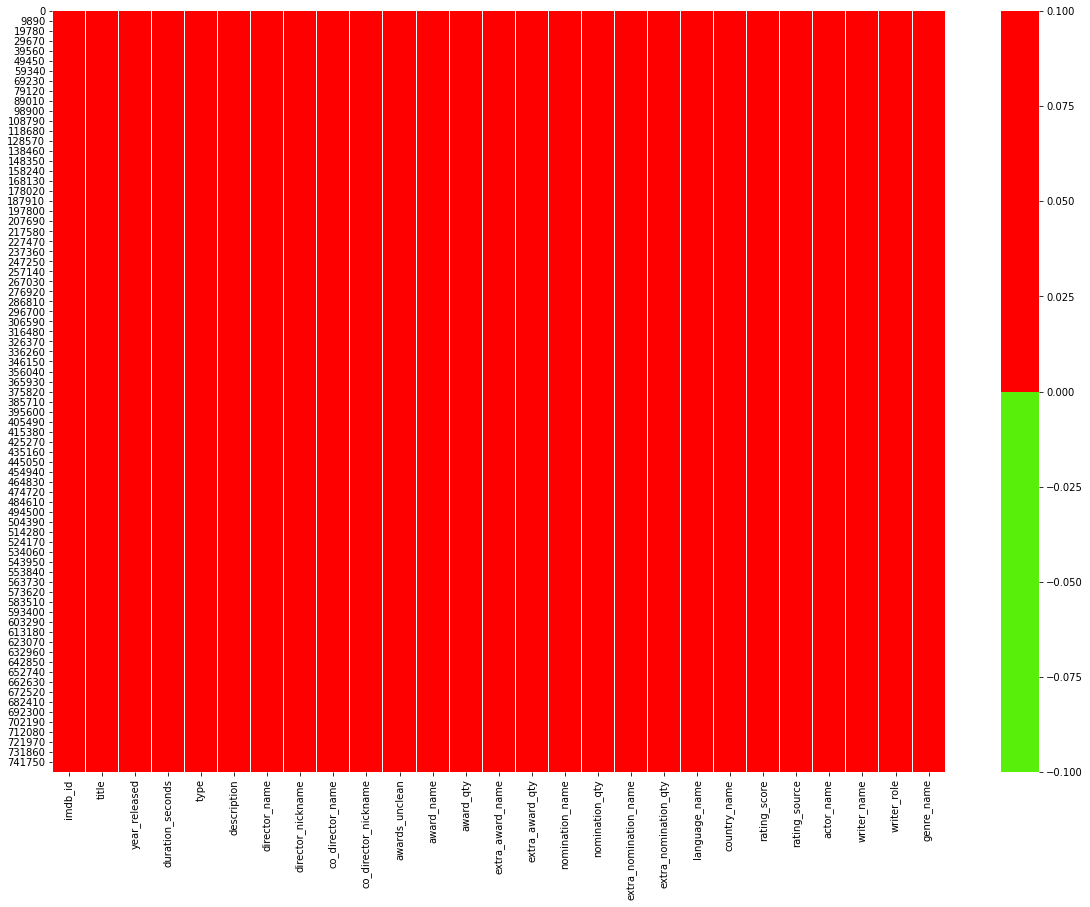

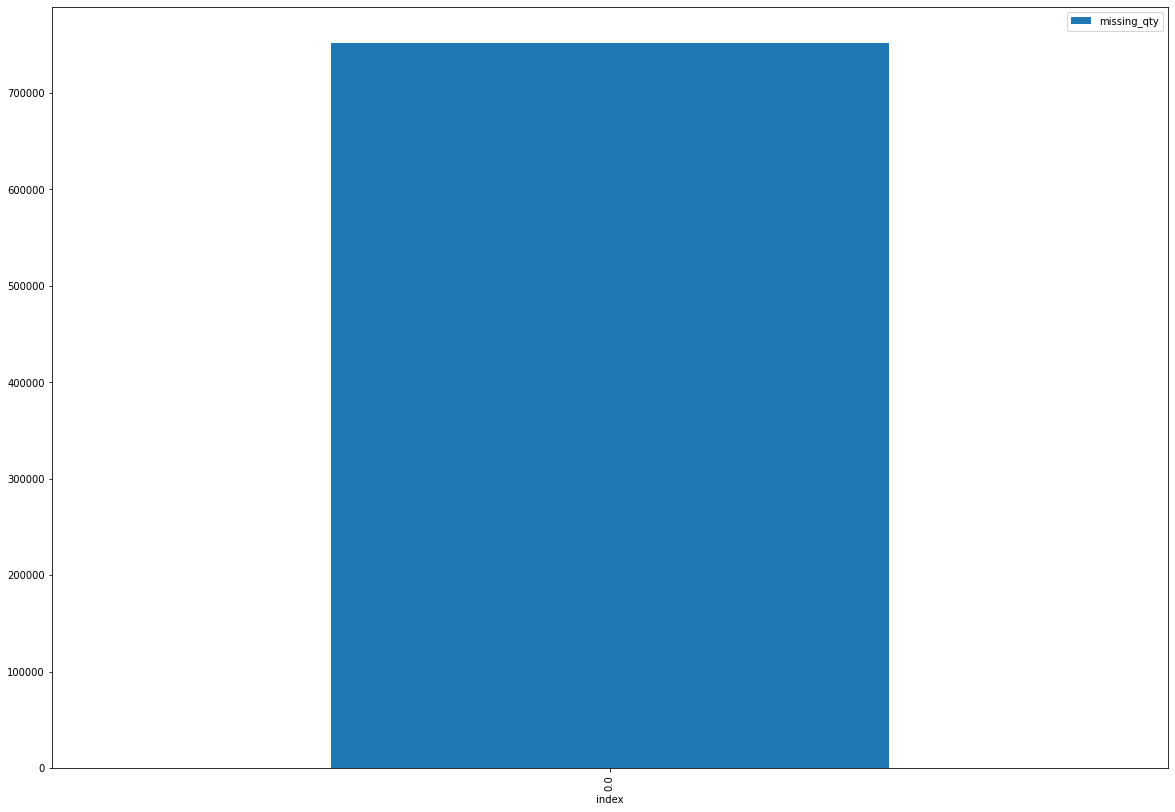

In [11]:
# it will not report the missing values as we replaced them by special keywords
#      such as "_MISSING_" where the column type is "object" (aka "string") 
DataframeHelper.get_report(df_all, 'All datasets together')